In [ ]:
import numpy as np
arr = np.load('MAPS.npy')
print(arr)
print(np.shape(arr))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(20426, 88)


In [ ]:
arr2 = np.empty((20426, 88), dtype = int) 
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if arr[i,j]==False:
            arr2[i,j]=int(0)
            int(arr2[i,j])
        elif arr[i,j]==True:
            arr2[i,j]=int(1)

         
print(arr2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
!pip install midiutil

In [ ]:
from midiutil.MidiFile import MIDIFile

mf = MIDIFile(1)
track = 0   
time = 0
delta = 0.000005
mf.addTrackName(track, time, "Output")
mf.addTempo(track, time, 120)

channel = 0
volume = 100
duration = 0.01 

for i in range(arr2.shape[0]):
    time=time + i*delta
    for j in range(arr2.shape[1]):
        if arr[i,j] == 1:
            pitch = j
            mf.addNote(track, channel, pitch, time, duration, volume)

with open("output.mid", 'wb') as outf:
    mf.writeFile(outf)

In [ ]:
!pip install pretty_midi

In [ ]:
import pretty_midi
import pandas as pd
path = "output.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

             Start         End  Pitch  Velocity Instrument
0         0.002083    0.002604     41       100     Output
1         0.002604    0.003125     41       100     Output
2         0.003125    0.003646     41       100     Output
3         0.003646    0.004167     41       100     Output
4         0.004167    0.004687     41       100     Output
...            ...         ...    ...       ...        ...
108929  520.888542  520.893229     34       100     Output
108930  520.888542  520.893229     41       100     Output
108931  520.888542  520.893229     49       100     Output
108932  520.888542  520.893229     58       100     Output
108933  520.888542  520.893229     65       100     Output

[108934 rows x 5 columns]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np


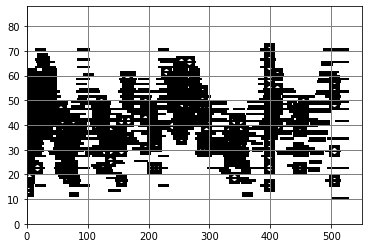

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<108934) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    # if my_reader[i][4]=='Right Hand' :
    #     color1 = 'royalblue'
    # else :
    #     color1 = 'darkorange'
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=10)
    ax.add_patch(rect)
    i+=1
    
    
# plt.xlabel("Time (seconds)", fontsize=150)
# plt.ylabel("Pitch", fontsize=150)


plt.xlim([0, 550])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

plt.show()

ACTUAL

In [ ]:
import pretty_midi
import pandas as pd
path = "MAPS.mid"
midi_data = pretty_midi.PrettyMIDI(path)
midi_list = []

pretty_midi.pretty_midi.MAX_TICK = 1e10
midi_data.tick_to_time(14325216)

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])
        
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=['Start', 'End', 'Pitch', 'Velocity', 'Instrument'])

print(df)

           Start         End  Pitch  Velocity Instrument
0       0.521985    6.701973     62        74           
1       1.379984    2.239995     61        69           
2       2.240987    6.702979     60        64           
3       3.114985    6.702979     57        61           
4       4.021975    6.705983     54        57           
...          ...         ...    ...       ...        ...
2196  235.487309  236.997300     86       102           
2197  235.488301  236.998306     55        79           
2198  235.488301  236.997300     70        93           
2199  235.488301  236.997300     79        90           
2200  235.491305  237.000304     62        79           

[2201 rows x 5 columns]


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

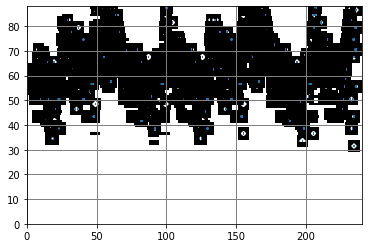

In [ ]:
fig, ax = plt.subplots()

i = 0
while(i<2200) :
    start = float(midi_list[i][0])
    pitch = float(midi_list[i][2])
    duration = float(midi_list[i][1]-midi_list[i][0])
    # if my_reader[i][4]=='Right Hand' :
    #     color1 = 'royalblue'
    # else :
    #     color1 = 'darkorange'
    rect = matplotlib.patches.Rectangle((start, pitch),duration, 1, ec='black', linewidth=10)
    ax.add_patch(rect)
    i+=1
    
    
# plt.xlabel("Time (seconds)", fontsize=150)
# plt.ylabel("Pitch", fontsize=150)


plt.xlim([0, 240])
plt.ylim([0, 88])

plt.grid(color='grey',linewidth=1)

plt.show()